In [1]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt


Just a couple of examples of the new plot() function which is imported from the levee_hunter.plotting. 

It conveniently takes plot_types as argument which lets user specify what to plot and in what order. Note that if user selects for example:
plot_types=['image', 'image_mask_overlay'], then the argument pred can be left as none, as it is not used for plotting. 


In the cells below a model is imported and dataset defined. Below that, there are a few examples of usage of this new plot() function.

In [2]:
from levee_hunter.levees_dataset import LeveesDataset

dataset = LeveesDataset(
    images_dir='../data/processed/1m_1024/images',
    masks_dir='../data/processed/1m_1024/masks',
    transform=None,
    weighted=True,
    )

len(dataset)

/home/pmucha/.conda/envs/fathom/lib/python3.11/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/home/pmucha/.conda/envs/fathom/lib/python3.11/site-packages/albumentations/core/validation.py:58: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/share/gpu5/pmucha/fathom/levee-hunter/levee_hunter/augmentations.py:16: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(
/share/gpu5/pmucha/fathom/levee-hunter/levee_hunter/augmentations.py:19: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  A.Lambda(
/share/gpu5/pmucha/fathom/levee-hu

1626

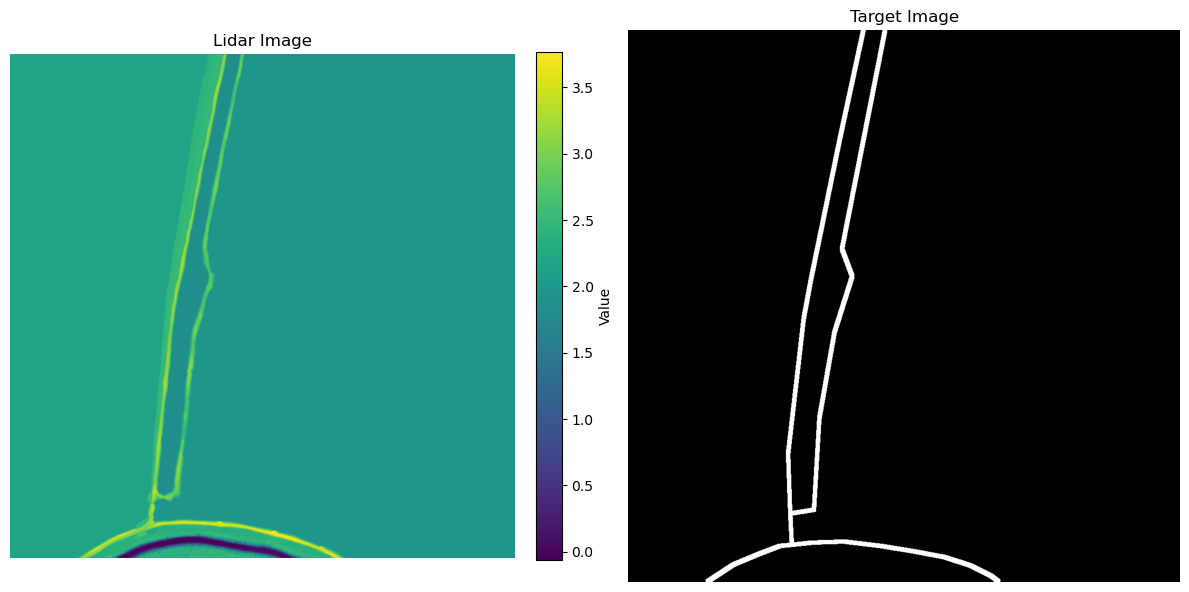

In [3]:
dataset.plot(idx=100, figsize=(12, 6), cmap='viridis', transform=False)

In [4]:
from levee_hunter.train_test_val_splitting import validation_split

file_ids = sorted(set(dataset.file_ids))[:45]
train_test_dataset, val_dataset = validation_split(dataset=dataset, file_ids=file_ids)

len(train_test_dataset), len(val_dataset)

(1423, 203)

In [5]:
from levee_hunter.train_test_val_splitting import train_test_split_dataset

train_dataset, test_dataset = train_test_split_dataset(dataset=train_test_dataset, test_size=0.07)

len(train_dataset), len(test_dataset), len(val_dataset)

(1323, 100, 203)

In [6]:
# we can check if their transformations are what we want them to be
train_dataset.transform, test_dataset.transform, val_dataset.transform

('train_transform', 'normalize_only', 'normalize_only')

In [7]:
# test and validation should be unweighted
test_dataset.weighted=False
val_dataset.weighted=False
train_dataset.weighted

True

In [8]:
batch_size = 14

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [9]:
model = smp.Segformer(
    encoder_name="mit_b0",      # Use the MIT-B0 encoder for SegFormer
    encoder_weights="imagenet", # Pretrained on ImageNet
    in_channels=1,              # Input channels (e.g., grayscale)
    classes=1                   # Number of output classes
).to(device)

In [10]:
# load the saved model
model.load_state_dict(torch.load("../models/1m_1024/Segformer-b0.pth"))
model.eval()

import levee_hunter.modeling.inference as inference
import levee_hunter.plotting as plotting

0


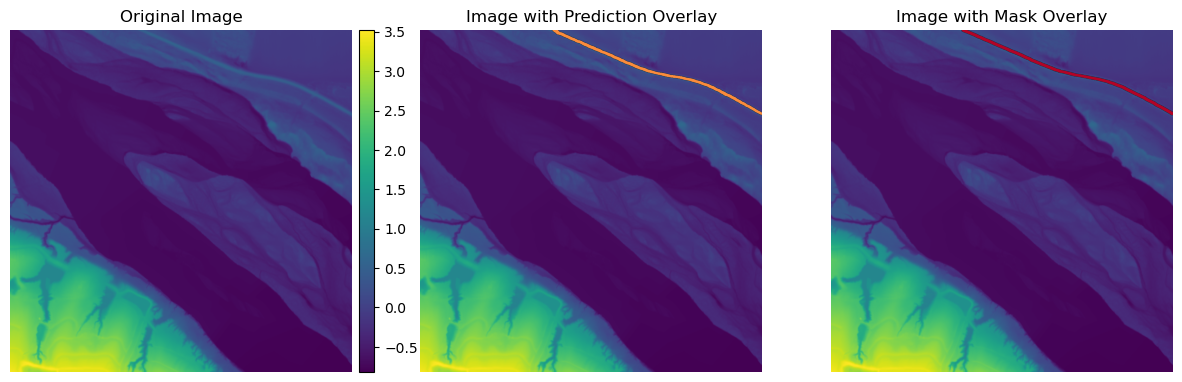

1


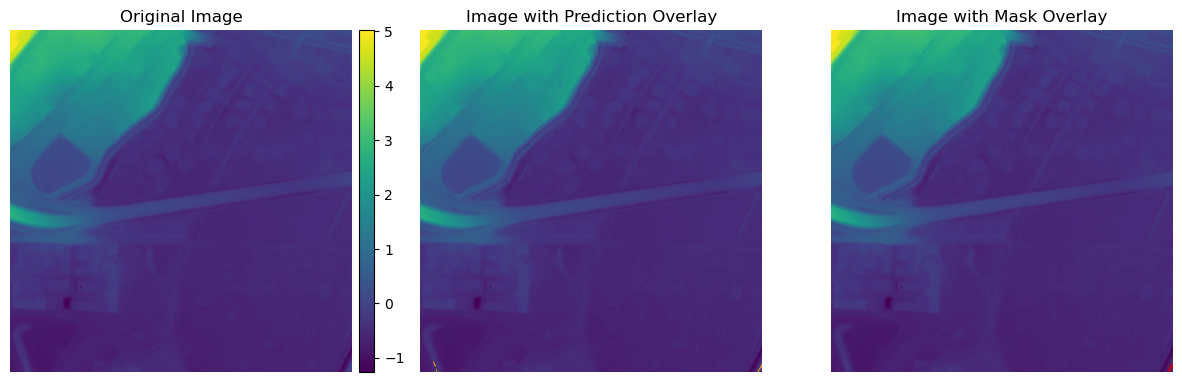

2


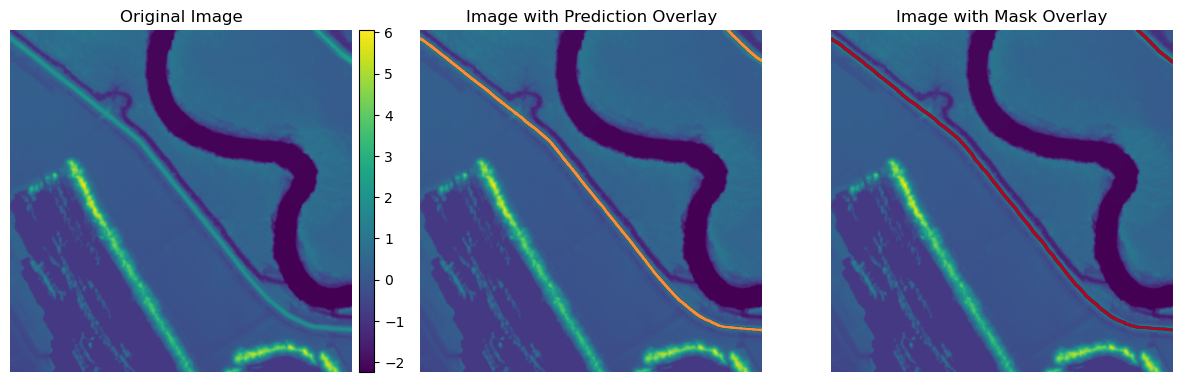

In [11]:
for ix in range(3):
    sample_image, sample_mask = test_dataset[ix]
    prediction = inference.infer(model=model, image=sample_image, device=device, apply_sigmoid=True, threshold=0.5)
    print(ix)
    output = plotting.plot(
        image=sample_image, 
        mask=sample_mask, 
        pred=prediction, 
        plot_types=['image', 'image_pred_overlay', 'image_mask_overlay'],
        figsize=(15, 6),
        cmap='viridis',
        inverted=True,
        powernorm_threshold=30,
    )

0


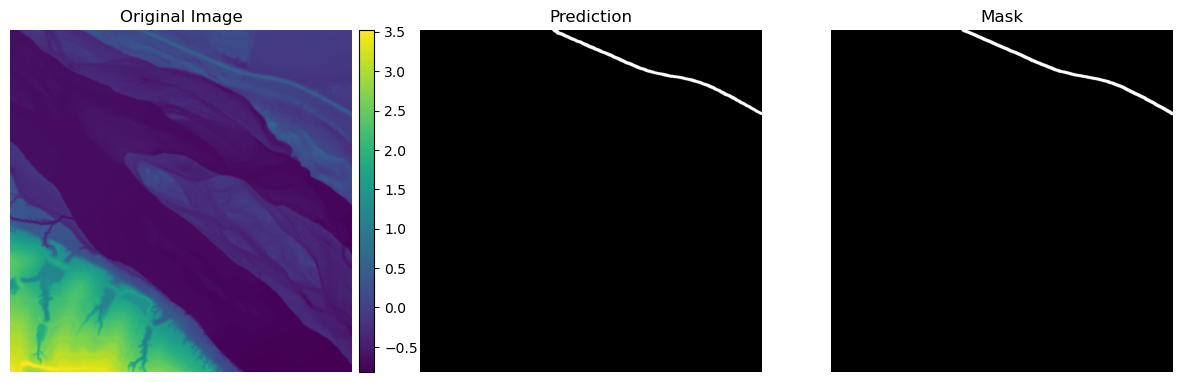

1


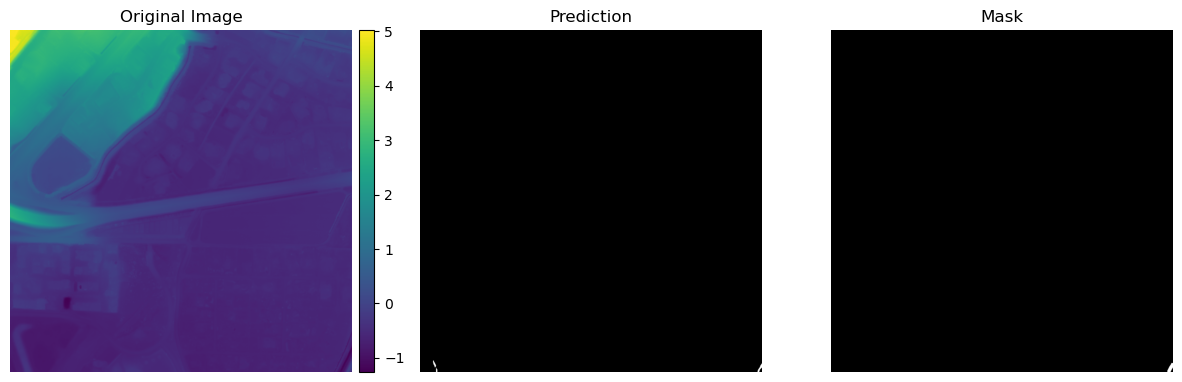

2


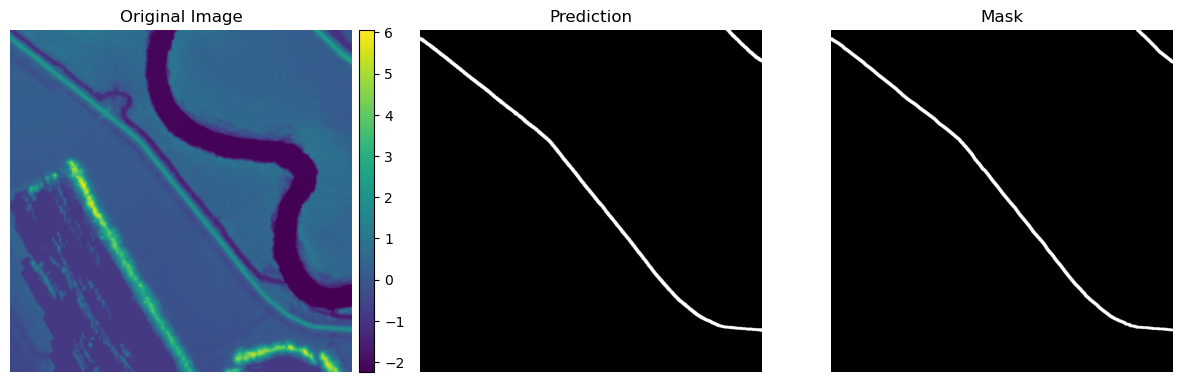

In [12]:
for ix in range(3):
    sample_image, sample_mask = test_dataset[ix]
    prediction = inference.infer(model=model, image=sample_image, device=device, apply_sigmoid=True, threshold=0.5)
    print(ix)
    output = plotting.plot(
        image=sample_image, 
        mask=sample_mask, 
        pred=prediction, 
        plot_types=['image', 'pred', 'mask'],
        figsize=(15, 6),
        cmap='viridis',
        inverted=True,
        powernorm_threshold=30,
    )

0


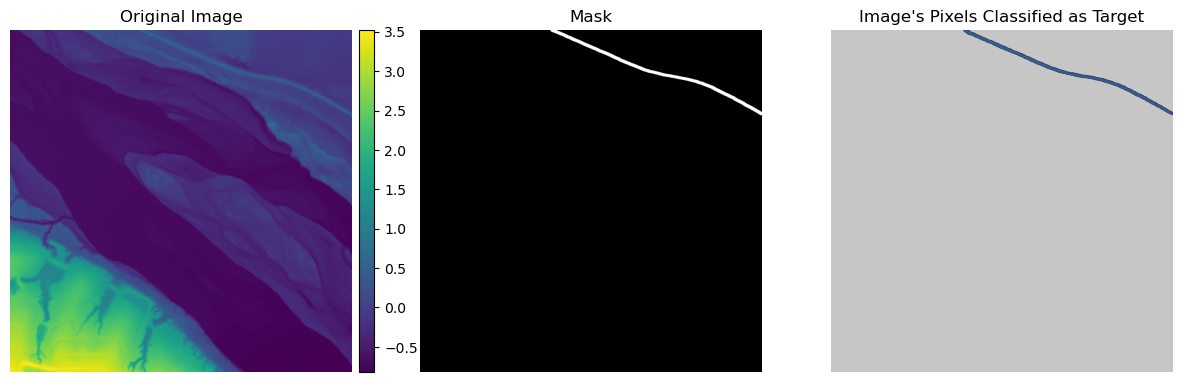

1


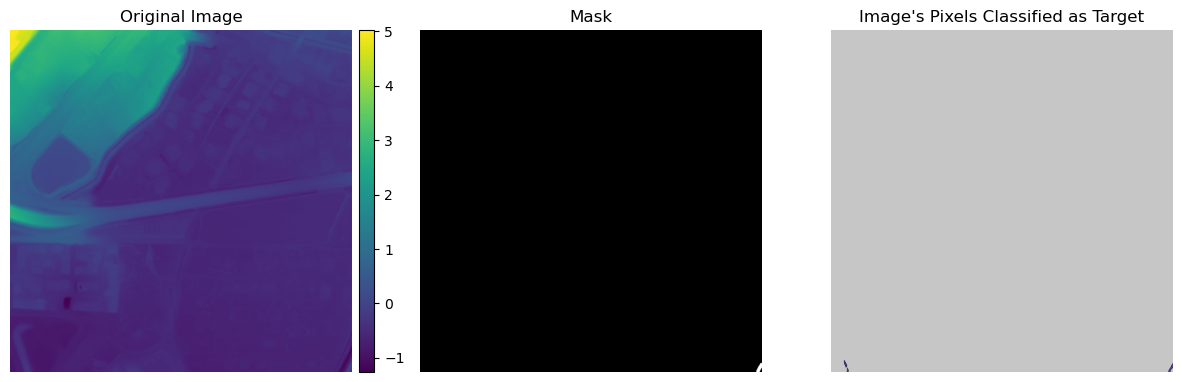

2


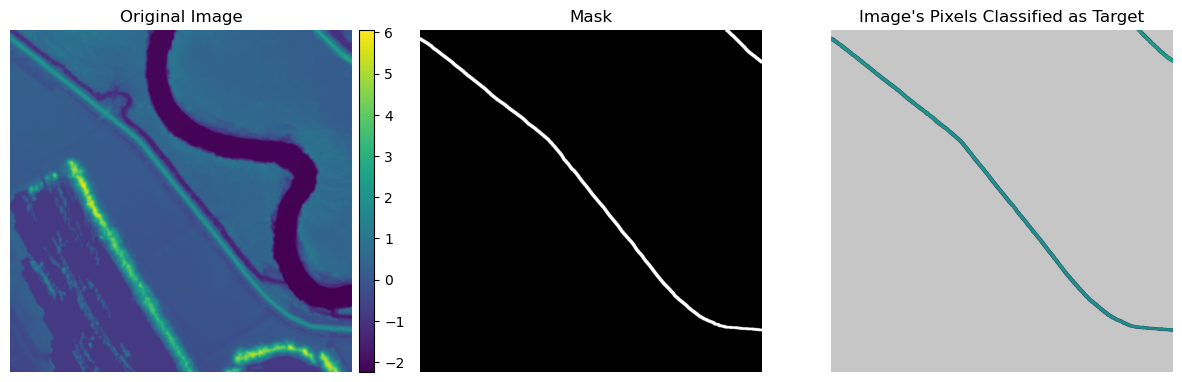

In [13]:
for ix in range(3):
    sample_image, sample_mask = test_dataset[ix]
    prediction = inference.infer(model=model, image=sample_image, device=device, apply_sigmoid=True, threshold=0.5)
    print(ix)
    output = plotting.plot(
        image=sample_image, 
        mask=sample_mask, 
        pred=prediction, 
        plot_types=['image', 'mask', 'predicted_pixels'],
        figsize=(15, 6),
        cmap='viridis',
        inverted=True,
        powernorm_threshold=30,
    )

0


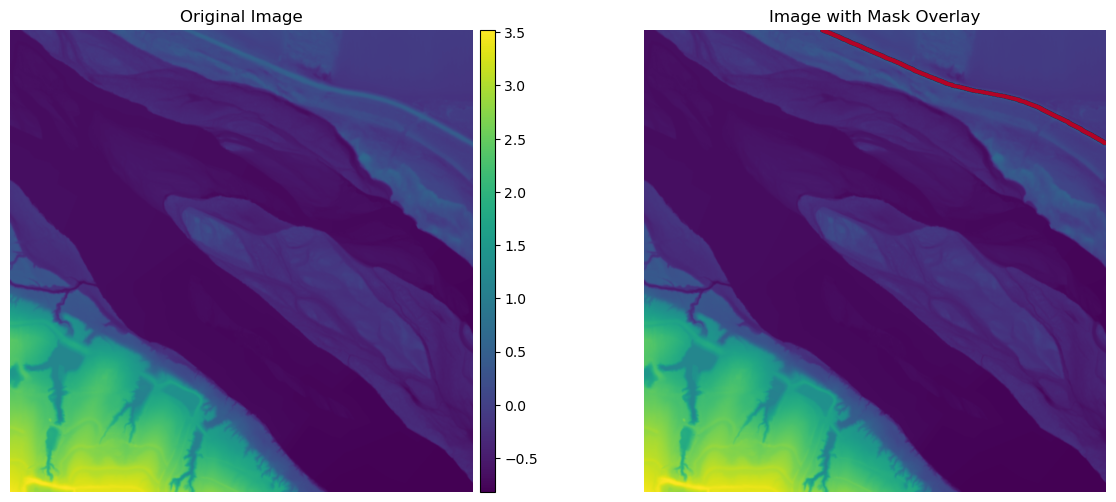

1


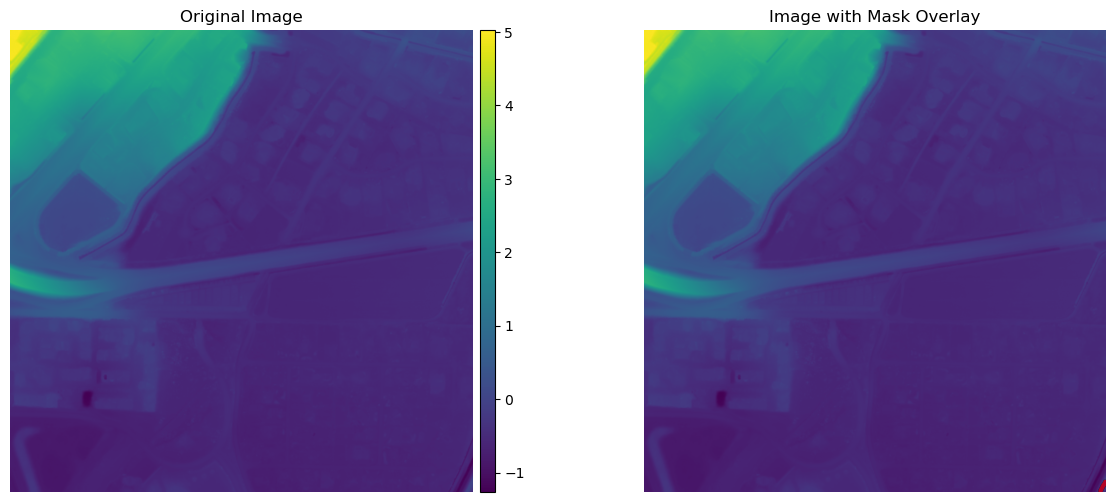

2


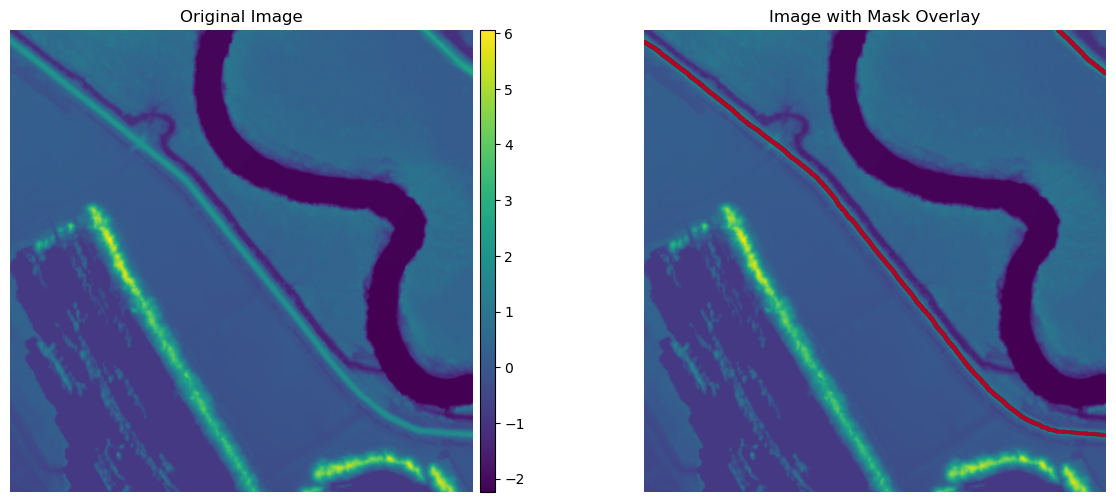

In [14]:
for ix in range(3):
    sample_image, sample_mask = test_dataset[ix]
    print(ix)
    output = plotting.plot(
        image=sample_image, 
        mask=sample_mask, 
        pred=None, 
        plot_types=['image', 'image_mask_overlay'],
        figsize=(15, 6),
        cmap='viridis',
        inverted=True,
        powernorm_threshold=30,
    )

0


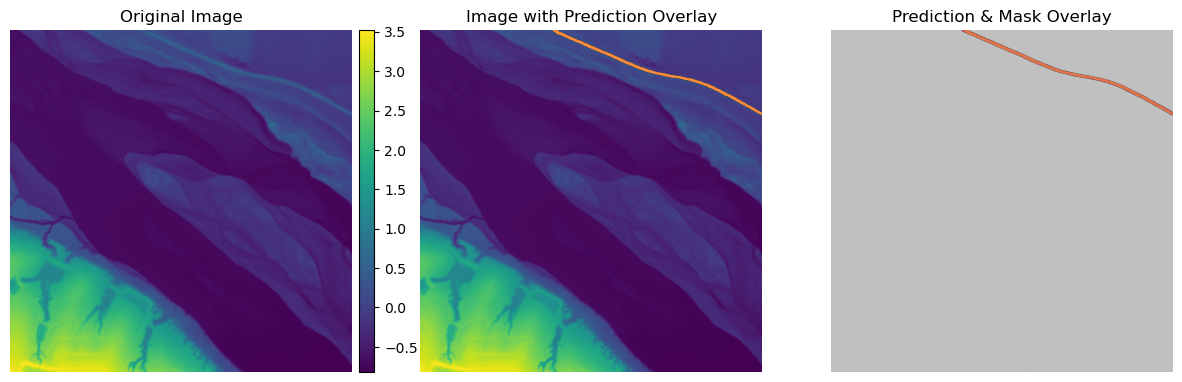

1


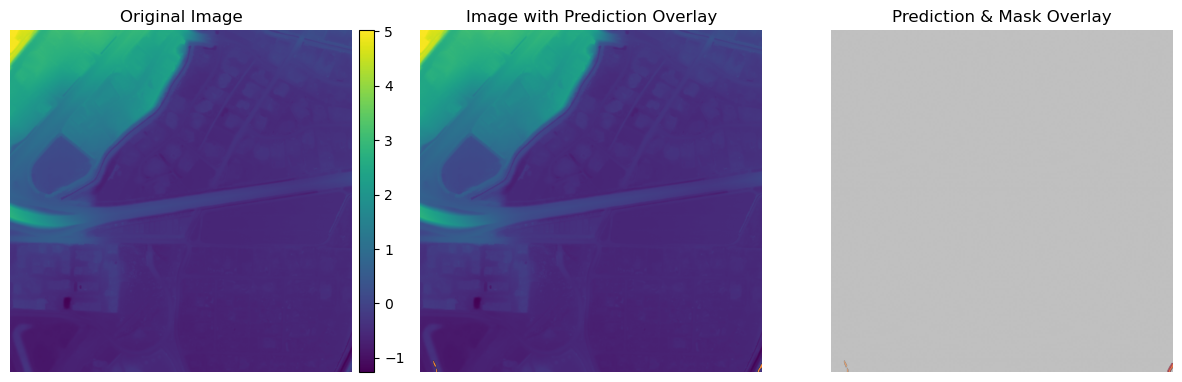

2


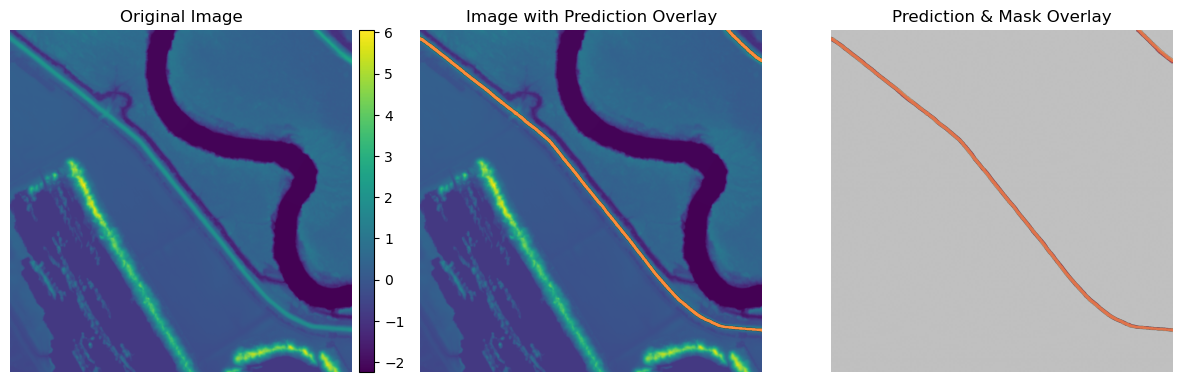

In [15]:
for ix in range(3):
    sample_image, sample_mask = test_dataset[ix]
    prediction = inference.infer(model=model, image=sample_image, device=device, apply_sigmoid=True, threshold=0.5)
    print(ix)
    output = plotting.plot(
        image=sample_image, 
        mask=sample_mask, 
        pred=prediction, 
        plot_types=['image', 'image_pred_overlay', 'pred_mask_overlay'],
        figsize=(15, 6),
        cmap='viridis',
        inverted=True,
        powernorm_threshold=30,
    )

0


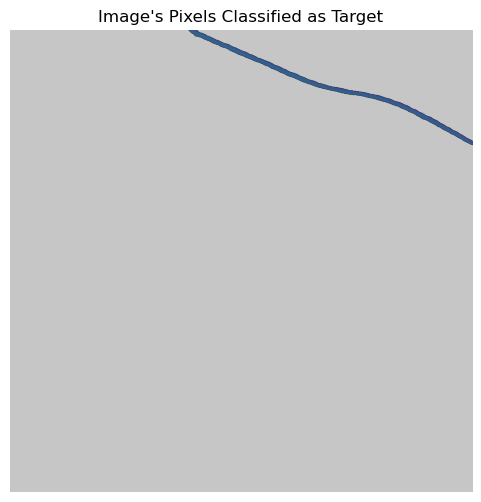

1


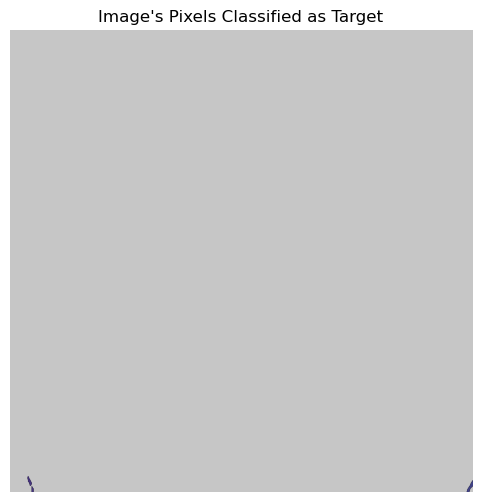

2


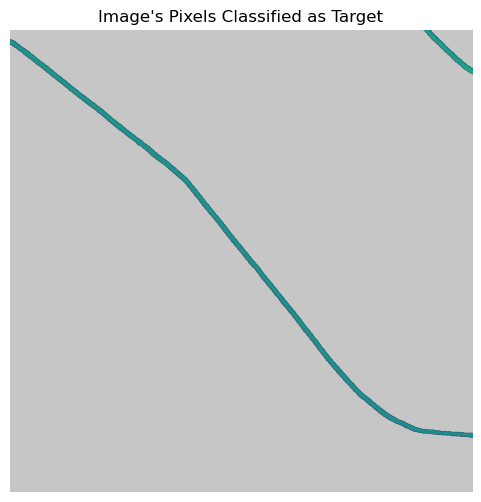

In [16]:
for ix in range(3):
    sample_image, sample_mask = test_dataset[ix]
    prediction = inference.infer(model=model, image=sample_image, device=device, apply_sigmoid=True, threshold=0.5)
    print(ix)
    output = plotting.plot(
        image=sample_image, 
        mask=None, 
        pred=prediction, 
        plot_types=['predicted_pixels'],
        figsize=(15, 6),
        cmap='viridis',
        inverted=True,
        powernorm_threshold=30,
    )

0


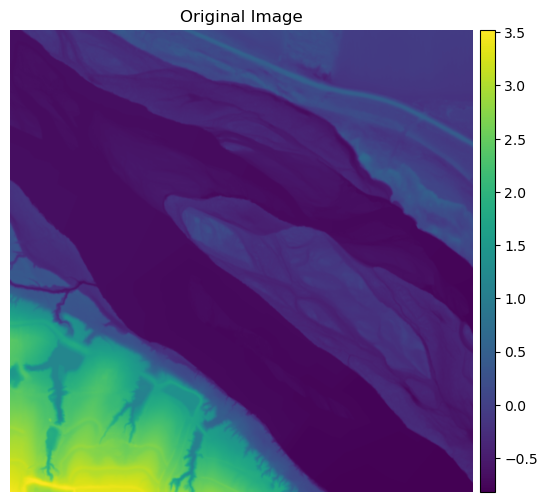

1


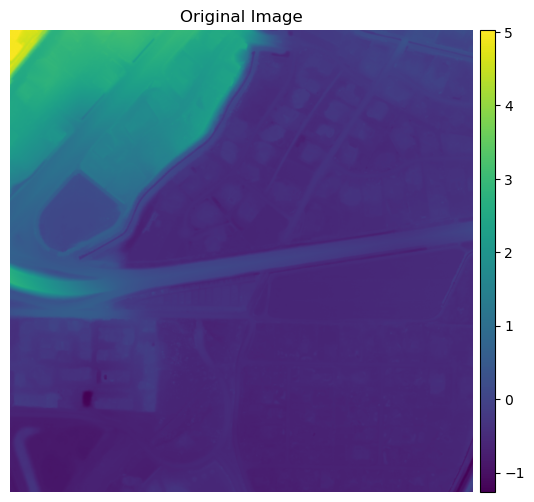

2


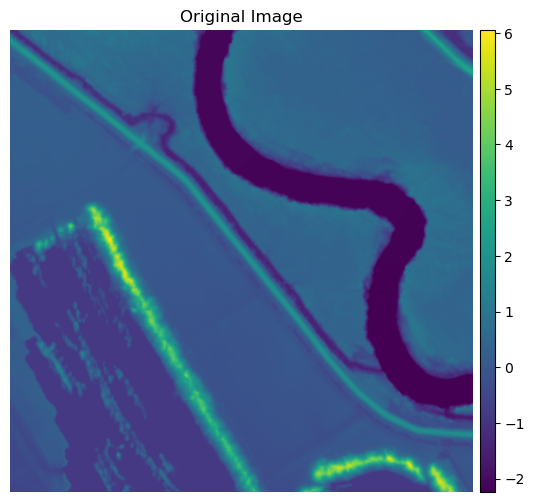

In [17]:
for ix in range(3):
    sample_image, sample_mask = test_dataset[ix]
    print(ix)
    output = plotting.plot(
        image=sample_image, 
        mask=None, 
        pred=None, 
        plot_types=['image'],
        figsize=(15, 6),
        cmap='viridis',
        inverted=True,
        powernorm_threshold=30,
    )

0


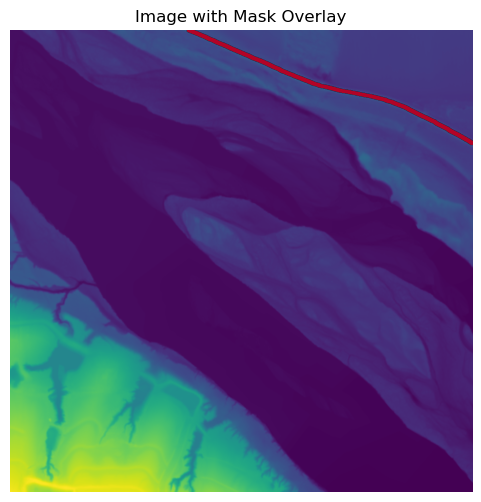

1


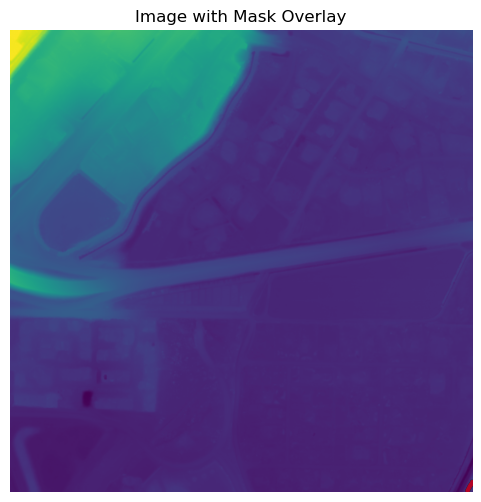

2


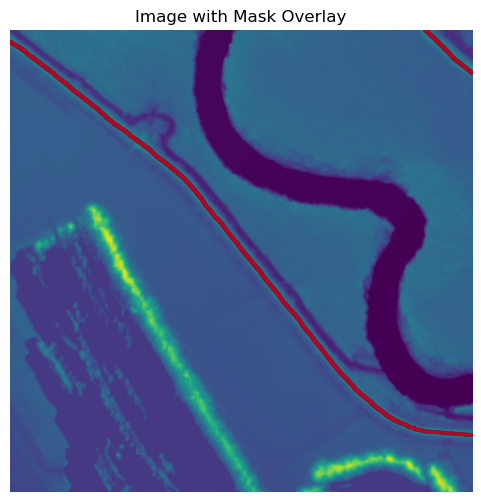

In [18]:
for ix in range(3):
    sample_image, sample_mask = test_dataset[ix]
    print(ix)
    output = plotting.plot(
        image=sample_image, 
        mask=sample_mask, 
        pred=None, 
        plot_types=['image_mask_overlay'],
        figsize=(15, 6),
        cmap='viridis',
        inverted=True,
        powernorm_threshold=30,
    )